In [1]:
from pyspark import SparkConf, SparkContext
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoderEstimator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from math import sqrt
from pyspark.mllib.clustering import KMeans, KMeansModel
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation

In [2]:
spark = SparkSession\
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value")\
    .getOrCreate()

In [3]:
df = spark.read.format("csv").options(header='true', inferschema='true').load('gs://finalproject20/data/Motor_Vehicle_Collisions_-_Crashes.csv')
df.show(1)

+-------------+-------------+-------+--------+--------+---------+--------------------+--------------+-----------------+--------------------+-------------------------+------------------------+-----------------------------+----------------------------+-------------------------+------------------------+--------------------------+-------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+------------+-------------------+-------------------+-------------------+-------------------+-------------------+
|ACCIDENT DATE|ACCIDENT TIME|BOROUGH|ZIP CODE|LATITUDE|LONGITUDE|            LOCATION|ON STREET NAME|CROSS STREET NAME|     OFF STREET NAME|NUMBER OF PERSONS INJURED|NUMBER OF PERSONS KILLED|NUMBER OF PEDESTRIANS INJURED|NUMBER OF PEDESTRIANS KILLED|NUMBER OF CYCLIST INJURED|NUMBER OF CYCLIST KILLED|NUMBER OF MOTORIST INJURED|NUMBER OF MOTORIST KILLED|CONTRIBUTING FACTOR VEHICLE 

In [4]:
manh = df.withColumnRenamed('NUMBER OF PERSONS INJURED','nopi').withColumnRenamed('ACCIDENT DATE','date')
manh = manh.filter(manh.nopi!='0').filter(manh.BOROUGH=='MANHATTAN')
manh.count()

39025

In [5]:
location = manh.select('LATITUDE','LONGITUDE','date').rdd
location.take(5)

[Row(LATITUDE=40.757362, LONGITUDE=-73.96068, date=u'09/01/2019'),
 Row(LATITUDE=40.798252, LONGITUDE=-73.95249, date=u'08/20/2019'),
 Row(LATITUDE=40.777973, LONGITUDE=-73.98216, date=u'09/14/2019'),
 Row(LATITUDE=40.847412, LONGITUDE=-73.93331, date=u'09/16/2019'),
 Row(LATITUDE=40.732346, LONGITUDE=-73.98495, date=u'09/14/2019')]

In [6]:
manh_lo = location.map(lambda x: (x[2].split('/'),x[0],x[1]))
manh_2018 = manh_lo.filter(lambda x: x[0][2]=='2018' and x[1]!=None and x[1]!=0 and x[0]>40.68 and x[2]!=None).map(lambda x: (x[1],x[2]))
manh_2018.take(10)

[(40.753242, -73.96662),
 (40.784042, -73.9565),
 (40.73978, -73.97952),
 (40.855556, -73.92918),
 (40.72192, -73.99004),
 (40.761486, -73.96062),
 (40.81088, -73.94694),
 (40.75046, -73.99528),
 (40.80389, -73.95577),
 (40.80034, -73.94789)]

In [203]:
manh_2018_19 = manh_lo.filter(lambda x: (x[0][2]=='2018' or x[0][2]=='2019') and x[1]!=None and x[1]!=0 and x[0]>40.68 and x[2]!=None).map(lambda x: (x[1],x[2]))
manh_2018_19.count()

8179

In [7]:
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

In [8]:
def calculate(k,location):
    SE = []
    for i in k:
        clusters = KMeans.train(location, i, maxIterations=10, initializationMode="random")
        WSSSE = clusters.computeCost(location)
        SE.append(WSSSE)
    return SE

In [9]:
k = [3,5,10,15,20,40,60,80,100]
SE = calculate(k,manh_2018)
print(SE)

[1.6083342114180026, 0.7931452081873435, 0.40077455761245834, 0.26633538037934273, 0.22159241037479294, 0.11139187975328238, 0.060219729543947366, 0.06757247388938115, 0.0339774333497176]


In [205]:
k = [3,5,10,15,20,40,60,80,100]
SE2 = calculate(k,manh_2018_19)
print(SE2)

[2.9801932139541836, 1.43257729389527, 0.8021650901223718, 0.4811947280730289, 0.4164635930112963, 0.18576170848631424, 0.12105854201993901, 0.10184096302784224, 0.08817511879820042]


Text(0,0.5,u'Sum of the Squared Error')

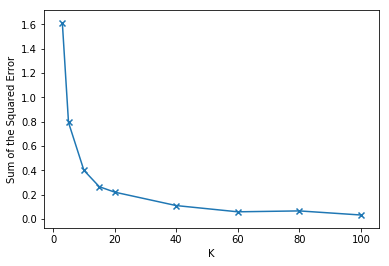

In [12]:
plt.plot(k,SE)
plt.scatter(k,SE,marker='x')
plt.xlabel('K')
plt.ylabel('Sum of the Squared Error')

In [14]:
colors = plt.cm.Spectral(np.linspace(0, 1, 20))

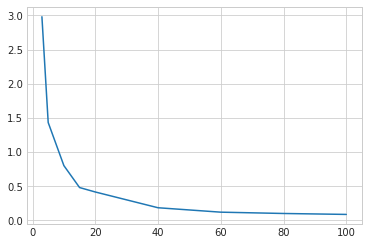

In [206]:
plt.plot(k,SE2)

In [19]:
data = manh_2018.collect()

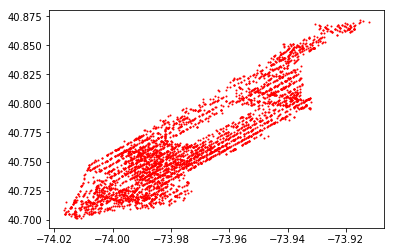

In [20]:
x = []
y = []
for i in data:
    if i[1]>-74.05 and i[1]<-73.9:
        x.append(i[0])
        y.append(i[1])
    
plt.plot(y,x,'ro',markersize=1)

In [16]:
clusters = KMeans.train(manh_2018, 20, maxIterations=10, initializationMode="random")
centers = clusters.centers
x2 = []
y2 = []
centers = list(centers)
for i in centers:
    if(i[0]!=0):
        x2.append(i[0])
        y2.append(i[1])

In [25]:
cluster1 = clust.collect()


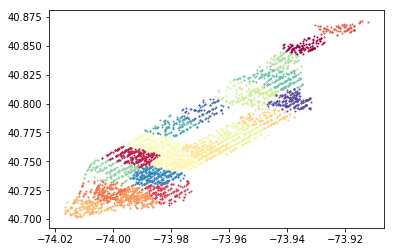

In [39]:
for item in cluster1:
    if item[0][1]>-74.05 and item[0][1]<-73.9:
        plt.scatter(item[0][1],item[0][0],c=colors[item[1]],s=1)

In [187]:
group = manh_2018.map(lambda x: (clusters.predict(x),1)).reduceByKey(lambda v1,v2: v1+v2).sortBy(lambda x:-x[1])
sequence = []
number = []
for i in group.collect():
    sequence.append(i[0])
    number.append(i[1])

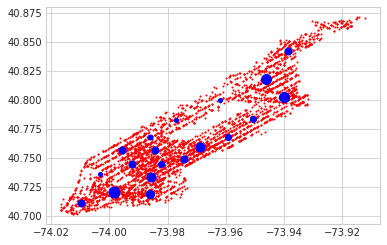

In [209]:
f, ax = plt.subplots(1)
ax.plot(y,x,'ro',markersize=1)
center_18 = []
for i in np.arange(19):
    center_18.append([x2[sequence[i]],y2[sequence[i]],number[i]])
    ax.plot(y2[sequence[i]],x2[sequence[i]],'bo',markersize=number[i]/30)


In [191]:
data_2018 = manh_2018.collect()

In [207]:
data_2018_19 = manh_2018_19.collect()

In [193]:
Latitude = pd.DataFrame(data_2018,index = range(1,len(data_2018)+1))
Latitude.to_csv('Latitude_2018.csv')
!gsutil cp 'Latitude_2018.csv' 'gs://finalproject20/data'

Copying file://Latitude_2018.csv [Content-Type=text/csv]...
/ [1 files][106.7 KiB/106.7 KiB]                                                
Operation completed over 1 objects/106.7 KiB.                                    


In [208]:
Latitude = pd.DataFrame(data_2018_19,index = range(1,len(data_2018_19)+1))
Latitude.to_csv('Latitude_2018_19.csv')
!gsutil cp 'Latitude_2018_19.csv' 'gs://finalproject20/data/kmeans'

Copying file://Latitude_2018_19.csv [Content-Type=text/csv]...
/ [1 files][196.7 KiB/196.7 KiB]                                                
Operation completed over 1 objects/196.7 KiB.                                    


In [211]:
centers_2018 = pd.DataFrame(center_18,index = range(1,len(center_18)+1))
centers_2018
centers_2018.to_csv('center_2018.csv')
!gsutil cp 'center_2018.csv' 'gs://finalproject20/data/kmeans'

Copying file://center_2018.csv [Content-Type=text/csv]...
/ [1 files][  838.0 B/  838.0 B]                                                
Operation completed over 1 objects/838.0 B.                                      


__Brooklyn__

In [212]:
brooklyn = df.withColumnRenamed('NUMBER OF PERSONS INJURED','nopi').withColumnRenamed('ACCIDENT DATE','date')
brooklyn = brooklyn.filter(brooklyn.nopi!='0').filter(brooklyn.BOROUGH=='BROOKLYN')

In [302]:
brooklyn_location = brooklyn.select('LATITUDE','LONGITUDE','date').rdd
brooklyn_location = brooklyn_location.map(lambda x: (x[2].split('/'),x[0],x[1]))
brooklyn_location = brooklyn_location.filter(lambda x: (x[0][2]=='2018' or x[0][2]=='2017') and x[1]!=None and x[1]!=0 and x[2]!=None).map(lambda x: (x[1],x[2]))

In [215]:
k = [3,5,10,15,20,40,60,80,100]
SE = calculate(k,brooklyn_location)
print(SE)

[10.26783778455066, 5.312529043001519, 2.802934614032503, 1.6337613653573206, 1.2788284804559102, 0.728387272142655, 0.46688424700455466, 0.3800259763076423, 0.30744111243849875]


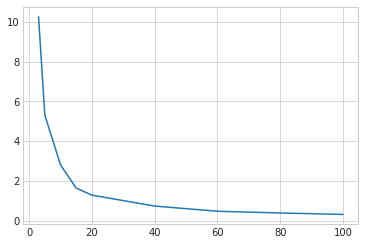

In [216]:
plt.plot(k,SE)

In [303]:
data_bro = brooklyn_location.collect()

In [304]:
Latitude = pd.DataFrame(data_bro,index = range(1,len(data_bro)+1))
Latitude.to_csv('Latitude_2018_bro.csv')
!gsutil cp 'Latitude_2018_bro.csv' 'gs://finalproject20/data/kmeans'

Copying file://Latitude_2018_bro.csv [Content-Type=text/csv]...
/ [1 files][452.5 KiB/452.5 KiB]                                                
Operation completed over 1 objects/452.5 KiB.                                    


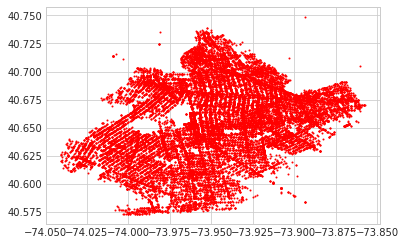

In [230]:
brooklyn_data = brooklyn_location.collect()
brooklyn_x = []
brooklyn_y = []
for i in brooklyn_data:
    if i[0]<40.75 and i[1]>-74.1 and i[1]<-73.85:
        brooklyn_x.append(i[0])
        brooklyn_y.append(i[1])
    
plt.plot(brooklyn_y,brooklyn_x,'ro',markersize=1)

In [305]:
brooklyn_clusters = KMeans.train(brooklyn_location, 20, maxIterations=10, initializationMode="random")
brooklyn_centers = brooklyn_clusters.centers
brooklyn_x2 = []
brooklyn_y2 = []
brooklyn_centers = list(brooklyn_centers)
for i in brooklyn_centers:
    if(i[0]!=0):
        brooklyn_x2.append(i[0])
        brooklyn_y2.append(i[1])

In [306]:
brooklyn_group = brooklyn_location.map(lambda x: (brooklyn_clusters.predict(x),1)).reduceByKey(lambda v1,v2: v1+v2).sortBy(lambda x:-x[1])
brooklyn_sequence = []
brooklyn_number = []
for i in brooklyn_group.collect():
    brooklyn_sequence.append(i[0])
    brooklyn_number.append(i[1])

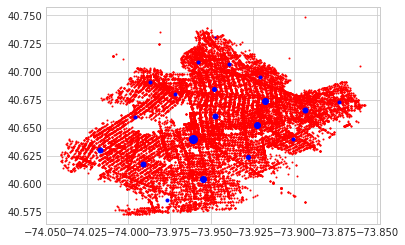

In [307]:
f2, ax2 = plt.subplots(1)
ax2.plot(brooklyn_y,brooklyn_x,'ro',markersize=1)
center_bro = []
for i in np.arange(20):
    center_bro.append([brooklyn_y2[brooklyn_sequence[i]],brooklyn_x2[brooklyn_sequence[i]],brooklyn_number[i]])
    ax2.plot(brooklyn_y2[brooklyn_sequence[i]],brooklyn_x2[brooklyn_sequence[i]],'bo',markersize=brooklyn_number[i]/200)

In [309]:
centers_bro = pd.DataFrame(center_bro,index = range(1,len(center_bro)+1))
centers_bro.to_csv('center_bro.csv')
!gsutil cp 'center_bro.csv' 'gs://finalproject20/data/kmeans'

Copying file://center_bro.csv [Content-Type=text/csv]...
/ [1 files][  890.0 B/  890.0 B]                                                
Operation completed over 1 objects/890.0 B.                                      


__QUEENS__

In [288]:
queens = df.withColumnRenamed('NUMBER OF PERSONS INJURED','nopi').withColumnRenamed('ACCIDENT DATE','date')
queens = queens.filter(queens.nopi!='0').filter(queens.BOROUGH=='QUEENS')
queens_location = queens.select('LATITUDE','LONGITUDE','date').rdd
queens_location = queens_location.map(lambda x: (x[2].split('/'),x[0],x[1])).filter(lambda x: (x[0][2]=='2018' or x[0][2]=='2017' or x[0][2]=='2016') and x[1]!=None and x[1]!=0 and x[2]!=None).map(lambda x: (x[1], x[2]))

[13.41075538877291, 8.70765782023152, 3.8351078697699177, 2.4954897825364246, 1.7479015595341942, 0.8368065814305328, 0.5959174790221556, 0.46555867095399145, 0.3396371244994685]


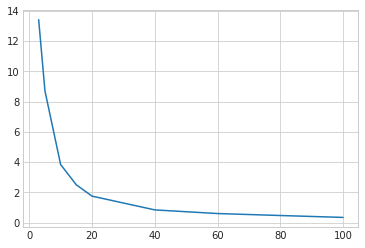

In [264]:
k = [3,5,10,15,20,40,60,80,100]
SE = calculate(k,queens_location)
print(SE)
plt.plot(k,SE)

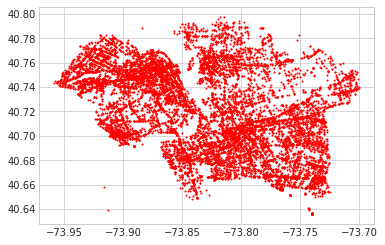

In [278]:
queens_data = queens_location.collect()
queens_x = []
queens_y = []
for i in queens_data:
    if i[1]<-73.7 and i[1]>-74 and i[0]>40.62 and i[0]<40.8:
        queens_x.append(i[0])
        queens_y.append(i[1])
    
plt.plot(queens_y,queens_x,'ro',markersize=1)

In [289]:
queens = queens_location.filter(lambda x:x[0]>40.62 and x[0]<40.8 and x[1]<-73.7 and x[1]>-74)

In [292]:
queens_clusters = KMeans.train(queens, 25, maxIterations=10, initializationMode="random")
queens_centers = queens_clusters.centers
queens_x2 = []
queens_y2 = []
queens_centers = list(queens_centers)
for i in queens_centers:
    if(i[0]!=0):
        queens_x2.append(i[0])
        queens_y2.append(i[1])

In [293]:
queens_group = queens_location.map(lambda x: (queens_clusters.predict(x),1)).reduceByKey(lambda v1,v2: v1+v2).sortBy(lambda x:-x[1])
queens_sequence = []
queens_number = []
for i in queens_group.collect():
    queens_sequence.append(i[0])
    queens_number.append(i[1])

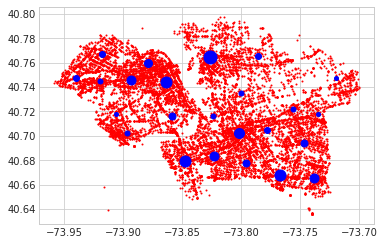

In [298]:
f3, ax3 = plt.subplots(1)
ax3.plot(queens_y,queens_x,'ro',markersize=1)
center_queen = []
for i in np.arange(24):
    center_queen.append([queens_x2[queens_sequence[i]],queens_y2[queens_sequence[i]],queens_number[i]])
    ax3.plot(queens_y2[queens_sequence[i]],queens_x2[queens_sequence[i]],'bo',markersize=queens_number[i]/120)

In [290]:
data_queen = queens.collect()

In [291]:
Latitude = pd.DataFrame(data_queen,index = range(1,len(data_queen)+1))
Latitude.to_csv('Latitude_2018_queen.csv')
!gsutil cp 'Latitude_2018_queen.csv' 'gs://finalproject20/data/kmeans'

Copying file://Latitude_2018_queen.csv [Content-Type=text/csv]...
/ [1 files][535.3 KiB/535.3 KiB]                                                
Operation completed over 1 objects/535.3 KiB.                                    


In [301]:
centers_queen = pd.DataFrame(center_queen,index = range(1,len(center_queen)+1))
centers_queen.to_csv('center_queen.csv')
!gsutil cp 'center_queen.csv' 'gs://finalproject20/data/kmeans'

Copying file://center_queen.csv [Content-Type=text/csv]...
/ [1 files][  1.1 KiB/  1.1 KiB]                                                
Operation completed over 1 objects/1.1 KiB.                                      


__car volume count__

In [4]:
df2 = spark.read.format("csv").options(header='true', inferschema='true').load('gs://finalproject20/data/Traffic_Volume_Counts__2014-2018_.csv')
df2.show(1)

+---+----------+------------+---------------+---------------+---------+----------+-------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+-------------+-------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+-------------+-------------+
| ID|Segment ID|Roadway Name|           From|             To|Direction|      Date|12:00-1:00 AM|1:00-2:00AM|2:00-3:00AM|3:00-4:00AM|4:00-5:00AM|5:00-6:00AM|6:00-7:00AM|7:00-8:00AM|8:00-9:00AM|9:00-10:00AM|10:00-11:00AM|11:00-12:00PM|12:00-1:00PM|1:00-2:00PM|2:00-3:00PM|3:00-4:00PM|4:00-5:00PM|5:00-6:00PM|6:00-7:00PM|7:00-8:00PM|8:00-9:00PM|9:00-10:00PM|10:00-11:00PM|11:00-12:00AM|
+---+----------+------------+---------------+---------------+---------+----------+-------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+-------------+-------------

In [48]:
def regulate(x):
    res = []
    for i in np.arange(2,31):
        if(i==2):
            res.append(x[i].lower())
        else:
            res.append(x[i])
    return res

In [55]:
volume1 = volume.map(lambda x: regulate(x)).filter(lambda x:x[4]=='09/17/2014')
volume1.take(100)

[[u'3 avenue',
  u'East 154 Street',
  u'East 155 Street',
  u'NB',
  u'09/17/2014',
  138,
  95,
  59,
  60,
  58,
  74,
  190,
  345,
  445,
  389,
  449,
  459,
  386,
  478,
  495,
  561,
  624,
  582,
  566,
  495,
  377,
  258,
  212,
  163],
 [u'3 avenue',
  u'East 155 Street',
  u'East 154 Street',
  u'SB',
  u'09/17/2014',
  112,
  69,
  57,
  44,
  83,
  116,
  274,
  457,
  391,
  317,
  327,
  292,
  349,
  326,
  337,
  385,
  390,
  353,
  319,
  337,
  235,
  204,
  154,
  135],
 [u'bedford park boulevard',
  u'Grand Concourse',
  u'Valentine Avenue',
  u'EB',
  u'09/17/2014',
  79,
  35,
  33,
  21,
  40,
  61,
  128,
  343,
  302,
  264,
  206,
  245,
  251,
  275,
  332,
  372,
  353,
  372,
  312,
  325,
  369,
  225,
  121,
  113],
 [u'bedford park boulevard',
  u'Grand Concourse',
  u'Valentine Avenue',
  u'WB',
  u'09/17/2014',
  53,
  40,
  24,
  28,
  39,
  51,
  131,
  377,
  394,
  345,
  269,
  285,
  275,
  272,
  404,
  403,
  382,
  471,
  299,
  268,
  22

weather

In [3]:
df3 = spark.read.format("csv").options(header='true', inferschema='true').load('gs://finalproject20/data/weather_data_nyc_centralpark_2016(1).csv')
df3.show(10)

+---------+-------------------+-------------------+-------------------+-------------+---------+----------+
|     date|maximum temperature|minimum temperature|average temperature|precipitation|snow fall|snow depth|
+---------+-------------------+-------------------+-------------------+-------------+---------+----------+
| 1-1-2016|                 42|                 34|               38.0|         0.00|      0.0|         0|
| 2-1-2016|                 40|                 32|               36.0|         0.00|      0.0|         0|
| 3-1-2016|                 45|                 35|               40.0|         0.00|      0.0|         0|
| 4-1-2016|                 36|                 14|               25.0|         0.00|      0.0|         0|
| 5-1-2016|                 29|                 11|               20.0|         0.00|      0.0|         0|
| 6-1-2016|                 41|                 25|               33.0|         0.00|      0.0|         0|
| 7-1-2016|                 46|      

In [19]:
def clean(x):
    res = ()
    if x[2]=='T' and x[3]=='T':
        res = (x[0], (x[1], '0', '0'))
    elif x[2]=='T' and x[3]!='T':
        res = (x[0], (x[1], '0', x[3]))
    elif x[2]!='T' and x[3]=='T':
        res = (x[0], (x[1], x[2], '0'))
    else:
        res = (x[0], (x[1], x[2], x[3]))
    return res

In [20]:
weather = df3.rdd
weather = weather.map(lambda x: ((x[0].split('-')[1], x[0].split('-')[0], x[0].split('-')[2]), x[3], x[4], x[5]))
final_weather = weather.map(lambda x: clean(x))
final_weather.take(300)

[((u'1', u'1', u'2016'), (38.0, u'0.00', u'0.0')),
 ((u'1', u'2', u'2016'), (36.0, u'0.00', u'0.0')),
 ((u'1', u'3', u'2016'), (40.0, u'0.00', u'0.0')),
 ((u'1', u'4', u'2016'), (25.0, u'0.00', u'0.0')),
 ((u'1', u'5', u'2016'), (20.0, u'0.00', u'0.0')),
 ((u'1', u'6', u'2016'), (33.0, u'0.00', u'0.0')),
 ((u'1', u'7', u'2016'), (38.5, u'0.00', u'0.0')),
 ((u'1', u'8', u'2016'), (38.5, u'0.00', u'0.0')),
 ((u'1', u'9', u'2016'), (43.5, '0', u'0.0')),
 ((u'1', u'10', u'2016'), (49.5, u'1.80', u'0.0')),
 ((u'1', u'11', u'2016'), (33.0, u'0.00', u'0.0')),
 ((u'1', u'12', u'2016'), (34.5, u'0.00', '0')),
 ((u'1', u'13', u'2016'), (26.0, u'0.00', u'0.0')),
 ((u'1', u'14', u'2016'), (30.0, u'0.00', '0')),
 ((u'1', u'15', u'2016'), (42.5, '0', u'0.0')),
 ((u'1', u'16', u'2016'), (47.0, u'0.24', u'0.0')),
 ((u'1', u'17', u'2016'), (36.0, u'0.05', u'0.4')),
 ((u'1', u'18', u'2016'), (24.5, '0', '0')),
 ((u'1', u'19', u'2016'), (22.0, u'0.00', u'0.0')),
 ((u'1', u'20', u'2016'), (32.0, u'0.00', 

In [21]:
weather_dict = final_weather.collectAsMap()
print(weather_dict)

{(u'4', u'27', u'2016'): (54.0, u'0.00', u'0.0'), (u'12', u'15', u'2016'): (26.5, u'0', '0'), (u'12', u'28', u'2016'): (37.0, u'0', u'0'), (u'7', u'2', u'2016'): (69.5, u'0', u'0'), (u'3', u'1', u'2016'): (45.5, u'0.00', u'0.0'), (u'7', u'23', u'2016'): (88.0, u'0', u'0'), (u'12', u'23', u'2016'): (42.5, u'0', u'0'), (u'3', u'24', u'2016'): (49.5, u'0.00', u'0.0'), (u'6', u'30', u'2016'): (76.0, u'0.00', u'0.0'), (u'10', u'20', u'2016'): (66.0, u'0', u'0'), (u'12', u'5', u'2016'): (43.5, u'0.19', u'0'), (u'5', u'3', u'2016'): (53.5, u'0.61', u'0.0'), (u'10', u'27', u'2016'): (47.5, u'1.41', u'0'), (u'8', u'14', u'2016'): (86.0, u'0.06', u'0'), (u'6', u'13', u'2016'): (65.5, u'0.00', u'0.0'), (u'2', u'27', u'2016'): (33.5, u'0.00', u'0.0'), (u'3', u'4', u'2016'): (34.5, u'0.11', u'0.4'), (u'12', u'21', u'2016'): (35.0, u'0', u'0'), (u'10', u'26', u'2016'): (44.5, u'0', u'0'), (u'4', u'4', u'2016'): (37.0, u'0.47', '0'), (u'11', u'23', u'2016'): (40.0, u'0', u'0'), (u'7', u'20', u'2016')

In [22]:
weather_dict['1','29','2016']

(35.5, u'0.00', u'0.0')

In [25]:
weather16 = df.withColumnRenamed('ACCIDENT DATE','date').withColumnRenamed('NUMBER OF PERSONS INJURED','npi').select('date','npi').rdd
weather16 = weather16.map(lambda x: (x[0].split('/'),x[1])).filter(lambda x: x[0][0]!=' PARKING LOT)."' and x[0][2]=='2016')
weather_count = weather16.map(lambda x: (tuple(x[0]),x[1])).map(lambda x: (x,1))
weather = weather_count.reduceByKey(lambda x1,x2: x1+x2).sortByKey()

In [76]:
def combine(x):
    res = []
    if str(x[0][0][0])[0]=='0' and str(x[0][0][1])[0]=='0':
        res = [x, weather_dict[str(x[0][0][0])[1],str(x[0][0][1])[1],str(x[0][0][2])]]
    elif str(x[0][0][0])[0]=='0' and str(x[0][0][1])[0]!='0':
        res = [x, weather_dict[str(x[0][0][0])[1],str(x[0][0][1]),str(x[0][0][2])]]
    elif  str(x[0][0][0])[0]!='0' and str(x[0][0][1])[0]=='0':
        res = [x, weather_dict[str(x[0][0][0]),str(x[0][0][1])[1],str(x[0][0][2])]]
    else:
        res = [x, weather_dict[str(x[0][0][0]),str(x[0][0][1]),str(x[0][0][2])]]                                                            
    return res

In [92]:
def combine2(x):
    res = []
    if str(x[0])[0]=='0' and str(x[1])[0]=='0':
        res = weather_dict[str(x[0])[1],str(x[1])[1],str(x[2])]
    elif str(x[0])[0]=='0' and str(x[1])[0]!='0':
        res = weather_dict[str(x[0])[1],str(x[1]),str(x[2])]
    elif  str(x[0])[0]!='0' and str(x[1])[0]=='0':
        res = weather_dict[str(x[0]),str(x[1])[1],str(x[2])]
    else:
        res = weather_dict[str(x[0]),str(x[1]),str(x[2])]                                
    return res

In [121]:
weather_data = weather.map(lambda x: combine(x)).filter(lambda x: x[0][0][1]!='0' and x[0][0][1]!='1')
weather_data.take(10)

[[(((u'01', u'01', u'2016'), u'2'), 18), (38.0, u'0.00', u'0.0')],
 [(((u'01', u'01', u'2016'), u'3'), 5), (38.0, u'0.00', u'0.0')],
 [(((u'01', u'01', u'2016'), u'4'), 3), (38.0, u'0.00', u'0.0')],
 [(((u'01', u'01', u'2016'), u'5'), 1), (38.0, u'0.00', u'0.0')],
 [(((u'01', u'01', u'2016'), u'6'), 1), (38.0, u'0.00', u'0.0')],
 [(((u'01', u'01', u'2016'), u'7'), 1), (38.0, u'0.00', u'0.0')],
 [(((u'01', u'02', u'2016'), u'2'), 14), (36.0, u'0.00', u'0.0')],
 [(((u'01', u'02', u'2016'), u'3'), 4), (36.0, u'0.00', u'0.0')],
 [(((u'01', u'02', u'2016'), u'4'), 2), (36.0, u'0.00', u'0.0')],
 [(((u'01', u'02', u'2016'), u'6'), 1), (36.0, u'0.00', u'0.0')]]

In [41]:
weather_dict[str(weather.collect()[0][0][0][0])[1],str(weather.collect()[0][0][0][1])[1],str(weather.collect()[0][0][0][2])]

(38.0, u'0.00', u'0.0')

In [122]:
weather_data_accumu = weather_data.map(lambda x: (x[0][0][0], x[0][1])).reduceByKey(lambda v1,v2: v1+v2).sortByKey()
data_accumu1 = weather_data_accumu.map(lambda x: (x[1], combine2(x[0]))).map(lambda x: (x[0],x[1][0]))
data_accumu2 = weather_data_accumu.map(lambda x: (x[1], combine2(x[0]))).map(lambda x: (x[0],float(x[1][1])))
data_accumu3 = weather_data_accumu.map(lambda x: (x[1], combine2(x[0]))).map(lambda x: (x[0],float(x[1][2])))
data_accumu1.take(20)

[(29, 38.0),
 (23, 36.0),
 (20, 40.0),
 (14, 25.0),
 (12, 20.0),
 (21, 33.0),
 (19, 38.5),
 (16, 38.5),
 (19, 43.5),
 (24, 49.5),
 (21, 33.0),
 (11, 34.5),
 (23, 26.0),
 (22, 30.0),
 (22, 42.5),
 (24, 47.0),
 (22, 36.0),
 (23, 24.5),
 (29, 22.0),
 (23, 32.0)]

In [123]:
weather1 = data_accumu1.toDF()
weather1 = weather1.withColumnRenamed('_1','number').withColumnRenamed('_2','feature')
weather2 = data_accumu2.toDF()
weather2 = weather2.withColumnRenamed('_1','number').withColumnRenamed('_2','feature')
weather3 = data_accumu3.toDF()
weather3 = weather3.withColumnRenamed('_1','number').withColumnRenamed('_2','feature')
weather2.show(1)

+------+-------+
|number|feature|
+------+-------+
|    29|    0.0|
+------+-------+
only showing top 1 row



In [126]:
weather3.stat.corr('number', 'feature')

-0.16812688708162593

test2

In [40]:
df4 = spark.read.format("csv").options(header='true', inferschema='true').load('gs://finalproject20/data/Weather.csv')
df4.show(10)

+-------------------+-----+-----+------+------+----+-----+-----+------+------+-----+--------+----+----+---------+---------+----------+----------+----------+----------+-------+-------+----------+------+---+----+----+----+-------+-------+
|    pickup_datetime|tempm|tempi|dewptm|dewpti| hum|wspdm|wspdi|wgustm|wgusti|wdird|   wdire|vism|visi|pressurem|pressurei|windchillm|windchilli|heatindexm|heatindexi|precipm|precipi|     conds|  icon|fog|rain|snow|hail|thunder|tornado|
+-------------------+-----+-----+------+------+----+-----+-----+------+------+-----+--------+----+----+---------+---------+----------+----------+----------+----------+-------+-------+----------+------+---+----+----+----+-------+-------+
|2015-12-31 00:15:00|  7.8| 46.0|   6.1|  43.0|89.0|  7.4|  4.6|  null|  null|   40|      NE| 4.0| 2.5|   1018.2|    30.07|       6.6|      43.9|      null|      null|    0.5|   0.02|Light Rain|  rain|  0|   1|   0|   0|      0|      0|
|2015-12-31 00:42:00|  7.8| 46.0|   6.1|  43.0|89.0|

In [41]:
weather16 = df.withColumnRenamed('ACCIDENT DATE','date').withColumnRenamed('ACCIDENT TIME','time').withColumnRenamed('NUMBER OF PERSONS INJURED','npi').select('date','time','npi').rdd
weather16 = weather16.filter(lambda x: x[1]!='0').map(lambda x: ([x[0].split('/')[0],x[0].split('/')[1],x[0].split('/')[2],x[1].split(':')[0]],x[2])).filter(lambda x: x[0][0]!=' PARKING LOT)."' and x[0][2]=='2016')
weather_count = weather16.map(lambda x: (tuple(x[0]),x[1])).map(lambda x: (x,1))
weather = weather_count.reduceByKey(lambda x1,x2: x1+x2).sortByKey()
weather.take(5)

[(((u'01', u'01', u'2016', u'0'), u'0'), 7),
 (((u'01', u'01', u'2016', u'0'), u'1'), 2),
 (((u'01', u'01', u'2016', u'0'), u'2'), 1),
 (((u'01', u'01', u'2016', u'1'), u'0'), 18),
 (((u'01', u'01', u'2016', u'1'), u'1'), 3)]

In [42]:
data2 = df4.withColumnRenamed('pickup_datetime','time').select('time','tempm','vism','precipm','fog').rdd

In [43]:
weather_dict2 = data2.map(lambda x:(x[0].strftime("%m,%d,%y,%H"),(x[1],x[2],x[3],x[4]))).filter(lambda x: x[0][6:8]=='16').collectAsMap()

In [9]:
print(weather_dict2)

{'06,03,16,18': (5.6, 16.1, None, 0), '06,03,16,19': (4.4, 16.1, None, 0), '06,03,16,12': (4.4, 16.1, None, 0), '06,03,16,13': (5.6, 16.1, None, 0), '06,03,16,10': (3.3, 16.1, None, 0), '06,03,16,11': (4.4, 16.1, None, 0), '06,03,16,16': (6.7, 16.1, None, 0), '06,03,16,17': (6.1, 16.1, None, 0), '06,03,16,14': (6.7, 16.1, None, 0), '06,03,16,15': (6.7, 16.1, None, 0), '11,10,16,18': (13.3, 16.1, None, 0), '11,10,16,19': (13.3, 16.1, None, 0), '11,10,16,12': (15.6, 16.1, None, 0), '11,10,16,13': (16.1, 16.1, None, 0), '11,10,16,10': (12.2, 16.1, None, 0), '11,10,16,11': (13.9, 16.1, None, 0), '11,10,16,16': (15.0, 16.1, None, 0), '11,10,16,17': (13.9, 16.1, None, 0), '11,10,16,14': (17.2, 16.1, None, 0), '11,10,16,15': (16.1, 16.1, None, 0), '10,02,16,21': (0.0, 16.1, None, 0), '10,02,16,20': (0.0, 16.1, None, 0), '10,02,16,23': (-0.6, 16.1, None, 0), '10,02,16,22': (-0.6, 16.1, None, 0), '12,29,16,06': (2.8, 16.1, None, 0), '12,29,16,07': (3.3, 16.1, None, 0), '05,20,16,16': (23.9, 16.

In [10]:
weather2 = weather.map(lambda x: (x[0][0],x[1])).reduceByKey(lambda v1,v2:v1+v2).sortByKey()
weather2.take(3)

[((u'01', u'01', u'2016', u'0'), 10),
 ((u'01', u'01', u'2016', u'1'), 23),
 ((u'01', u'01', u'2016', u'10'), 12)]

In [44]:
weather_injure = weather.filter(lambda x:x[0][1]!=None).map(lambda x:(x[0][0],(x[1],x[1]*int(x[0][1]))))
weather_injure.reduceByKey(lambda v1,v2:(v1[0]+v2[0],v1[1]+v2[1])).sortByKey().take(3)

[((u'01', u'01', u'2016', u'0'), (10, 4)),
 ((u'01', u'01', u'2016', u'1'), (23, 9)),
 ((u'01', u'01', u'2016', u'10'), (12, 1))]

In [45]:
def combine3(x):
    res = []
    if len(x[0][3])==2:
        res = str(x[0][0])+','+str(x[0][1])+','+str(x[0][2][2:4])+','+str(x[0][3])
    else:
        res = str(x[0][0])+','+str(x[0][1])+','+str(x[0][2][2:4])+','+'0'+str(x[0][3])
    if res in weather_dict2.keys():
        return (x[1],weather_dict2[res])
    

In [12]:
weather_combine = weather2.map(lambda x: combine3(x))
weather_combine.take(3)

[(10, (5.6, 16.1, None, 0)),
 (23, (5.0, 16.1, None, 0)),
 (12, (4.4, 16.1, None, 0))]

In [49]:
weather_ave = weather_injure.map(lambda x: combine3(x))
weather_ave_clean = weather_ave.map(lambda x:clean(x)).filter(lambda x: x!=None and x[1][1]!=None)
weather_ave_clean.take(50)

[((7, 0), (5.6, 16.1, 0, 0)),
 ((2, 2), (5.6, 16.1, 0, 0)),
 ((1, 2), (5.6, 16.1, 0, 0)),
 ((18, 0), (5.0, 16.1, 0, 0)),
 ((3, 3), (5.0, 16.1, 0, 0)),
 ((1, 2), (5.0, 16.1, 0, 0)),
 ((1, 4), (5.0, 16.1, 0, 0)),
 ((11, 0), (4.4, 16.1, 0, 0)),
 ((1, 1), (4.4, 16.1, 0, 0)),
 ((7, 0), (4.4, 16.1, 0, 0)),
 ((1, 1), (4.4, 16.1, 0, 0)),
 ((1, 2), (4.4, 16.1, 0, 0)),
 ((14, 0), (4.4, 16.1, 0, 0)),
 ((1, 2), (4.4, 16.1, 0, 0)),
 ((9, 0), (4.4, 16.1, 0, 0)),
 ((1, 1), (4.4, 16.1, 0, 0)),
 ((1, 2), (4.4, 16.1, 0, 0)),
 ((1, 4), (4.4, 16.1, 0, 0)),
 ((24, 0), (3.9, 16.1, 0, 0)),
 ((1, 1), (3.9, 16.1, 0, 0)),
 ((2, 4), (3.9, 16.1, 0, 0)),
 ((18, 0), (3.9, 16.1, 0, 0)),
 ((2, 2), (3.9, 16.1, 0, 0)),
 ((22, 0), (3.3, 16.1, 0, 0)),
 ((1, 1), (3.3, 16.1, 0, 0)),
 ((12, 0), (3.3, 16.1, 0, 0)),
 ((1, 1), (3.3, 16.1, 0, 0)),
 ((1, 2), (3.3, 16.1, 0, 0)),
 ((11, 0), (2.8, 16.1, 0, 0)),
 ((2, 2), (2.8, 16.1, 0, 0)),
 ((1, 6), (2.8, 16.1, 0, 0)),
 ((10, 0), (2.8, 16.1, 0, 0)),
 ((4, 4), (2.8, 16.1, 0, 0)),
 

In [50]:
visibility = weather_ave_clean.map(lambda x:(x[1][1],(x[0][1],x[0][0])))
visib = visibility.reduceByKey(lambda v1,v2:(v1[0]+v2[0],v1[1]+v2[1])).sortByKey()
visibility.take(20)

[(16.1, (0, 7)),
 (16.1, (2, 2)),
 (16.1, (2, 1)),
 (16.1, (0, 18)),
 (16.1, (3, 3)),
 (16.1, (2, 1)),
 (16.1, (4, 1)),
 (16.1, (0, 11)),
 (16.1, (1, 1)),
 (16.1, (0, 7)),
 (16.1, (1, 1)),
 (16.1, (2, 1)),
 (16.1, (0, 14)),
 (16.1, (2, 1)),
 (16.1, (0, 9)),
 (16.1, (1, 1)),
 (16.1, (2, 1)),
 (16.1, (4, 1)),
 (16.1, (0, 24)),
 (16.1, (1, 1))]

In [348]:
prec = weather_ave_clean.map(lambda x:(x[1][2],(x[0][1],x[0][0],1)))
prec2 = prec.reduceByKey(lambda v1,v2:(v1[0]+v2[0],v1[1]+v2[1],v1[2]+v2[2])).sortByKey()
prec2.take(5)

[(0, (54358, 207329, 21919)),
 (0.3, (1031, 4048, 405)),
 (0.5, (682, 2682, 252)),
 (0.8, (350, 1295, 121)),
 (1.0, (372, 1067, 118))]

In [88]:
visibility2 = weather_ave_clean.map(lambda x:(x[1][1],x[0][1]/float(x[0][0])))
visibility2.take(50)

[(16.1, 0.0),
 (16.1, 1.0),
 (16.1, 2.0),
 (16.1, 0.0),
 (16.1, 1.0),
 (16.1, 2.0),
 (16.1, 4.0),
 (16.1, 0.0),
 (16.1, 1.0),
 (16.1, 0.0),
 (16.1, 1.0),
 (16.1, 2.0),
 (16.1, 0.0),
 (16.1, 2.0),
 (16.1, 0.0),
 (16.1, 1.0),
 (16.1, 2.0),
 (16.1, 4.0),
 (16.1, 0.0),
 (16.1, 1.0),
 (16.1, 2.0),
 (16.1, 0.0),
 (16.1, 1.0),
 (16.1, 0.0),
 (16.1, 1.0),
 (16.1, 0.0),
 (16.1, 1.0),
 (16.1, 2.0),
 (16.1, 0.0),
 (16.1, 1.0),
 (16.1, 6.0),
 (16.1, 0.0),
 (16.1, 1.0),
 (16.1, 0.0),
 (16.1, 1.0),
 (16.1, 2.0),
 (16.1, 3.0),
 (16.1, 4.0),
 (16.1, 0.0),
 (16.1, 1.0),
 (16.1, 0.0),
 (16.1, 1.0),
 (16.1, 2.0),
 (16.1, 3.0),
 (16.1, 0.0),
 (16.1, 2.0),
 (16.1, 0.0),
 (16.1, 1.0),
 (16.1, 0.0),
 (16.1, 1.0)]

In [47]:
def clean(x):
    if x!=None:
        if x[1][2]==None:
            return (x[0],(x[1][0], x[1][1], 0,x[1][3]))
        else: 
            return x

In [14]:
weather_combine_clean = weather_combine.map(lambda x: clean(x)).filter(lambda x: x!=None)
weather_combine_clean.take(20)

[(10, (5.6, 16.1, 0, 0)),
 (23, (5.0, 16.1, 0, 0)),
 (12, (4.4, 16.1, 0, 0)),
 (9, (4.4, 16.1, 0, 0)),
 (15, (4.4, 16.1, 0, 0)),
 (12, (4.4, 16.1, 0, 0)),
 (27, (3.9, 16.1, 0, 0)),
 (20, (3.9, 16.1, 0, 0)),
 (23, (3.3, 16.1, 0, 0)),
 (14, (3.3, 16.1, 0, 0)),
 (14, (2.8, 16.1, 0, 0)),
 (14, (2.8, 16.1, 0, 0)),
 (28, (5.0, 16.1, 0, 0)),
 (19, (2.2, 16.1, 0, 0)),
 (12, (1.7, 16.1, 0, 0)),
 (13, (1.7, 16.1, 0, 0)),
 (9, (1.7, 16.1, 0, 0)),
 (24, (5.0, 16.1, 0, 0)),
 (19, (4.4, 16.1, 0, 0)),
 (20, (4.4, 16.1, 0, 0))]

In [48]:
def change(x):
    if x[1]==1:
        return (x[0],'fog')
    else:
        return (x[0],'no fog')

In [120]:
#weather_combine_clean.filter(lambda x: x==None).count()
dataset1 = weather_combine_clean.map(lambda x: (x[0],x[1][3])).map(lambda x: change(x)).toDF().toPandas()
dataset1.head(5)

,_1,_2
0,10,no fog
1,23,no fog
2,12,no fog
3,9,no fog
4,15,no fog


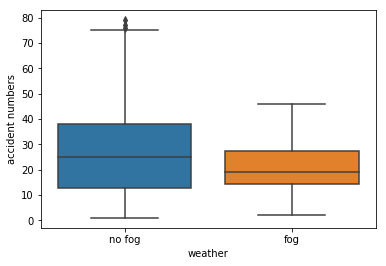

In [130]:
import seaborn as sns
dataset1=dataset1.rename(columns={"_1":"accident numbers","_2":"weather"})
sns.boxplot(x='weather',y='accident numbers',data=dataset1)


In [113]:
fog = weather_combine_clean.filter(lambda x: x[1][3]==1).map(lambda x: x[0]).collect()


In [21]:
dataset3 = weather_combine_clean.map(lambda x: (x[0],x[1][2])).collect()

In [39]:
dataset4 = weather_combine_clean.map(lambda x: (x[0],x[1][0])).collect()

In [45]:
dataset5 = weather_combine_clean.map(lambda x: (x[0],x[1][1])).collect()

In [51]:
dataset6 = visib.collect()
dataset6

[(0.4, (54, 374)),
 (0.8, (93, 358)),
 (1.2, (90, 509)),
 (1.6, (142, 596)),
 (2.0, (227, 810)),
 (2.4, (192, 813)),
 (2.8, (256, 946)),
 (3.2, (302, 1058)),
 (4.0, (312, 1112)),
 (4.8, (634, 2314)),
 (6.4, (1060, 3880)),
 (8.0, (1226, 4664)),
 (9.7, (1486, 5602)),
 (11.3, (2584, 9748)),
 (12.9, (4990, 19428)),
 (14.5, (7011, 26784)),
 (16.1, (37672, 143215))]

In [349]:
dataset8 = prec2.collect()

In [350]:
dataset8

[(0, (54358, 207329, 21919)),
 (0.3, (1031, 4048, 405)),
 (0.5, (682, 2682, 252)),
 (0.8, (350, 1295, 121)),
 (1.0, (372, 1067, 118)),
 (1.3, (191, 764, 78)),
 (1.5, (138, 457, 49)),
 (1.8, (130, 564, 61)),
 (2.0, (177, 553, 51)),
 (2.3, (97, 307, 40)),
 (2.5, (84, 299, 26)),
 (2.8, (70, 272, 32)),
 (3.0, (41, 171, 18)),
 (3.3, (36, 190, 16)),
 (3.6, (47, 160, 21)),
 (3.8, (48, 214, 20)),
 (4.1, (10, 61, 8)),
 (4.3, (1, 17, 2)),
 (4.6, (28, 136, 11)),
 (4.8, (27, 105, 9)),
 (5.1, (74, 200, 22)),
 (5.3, (36, 87, 9)),
 (5.6, (1, 16, 2)),
 (6.1, (14, 47, 7)),
 (6.3, (9, 44, 3)),
 (6.6, (38, 165, 9)),
 (7.1, (10, 33, 3)),
 (7.4, (21, 101, 7)),
 (7.6, (9, 42, 3)),
 (7.9, (12, 40, 3)),
 (8.1, (36, 155, 11)),
 (8.4, (37, 143, 9)),
 (8.6, (22, 61, 3)),
 (8.9, (35, 126, 8)),
 (9.9, (6, 39, 3)),
 (10.2, (15, 68, 6)),
 (11.2, (0, 23, 1)),
 (11.4, (7, 12, 3)),
 (11.7, (10, 22, 4)),
 (11.9, (3, 12, 2)),
 (12.7, (7, 12, 3)),
 (15.7, (11, 72, 5))]

In [99]:
dataset7 = visibility.collect()

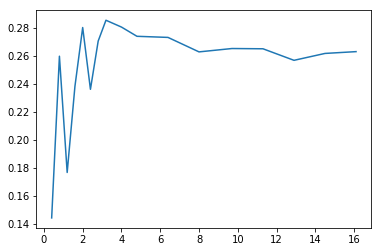

In [52]:
x2 = []
y2 = []
vis = []
for i in dataset6:
    #vis.append([i[0],float(i[1][0])/i[1][1]])
    x2.append(i[0])
    y2.append(float(i[1][0])/i[1][1])
plt.plot(x2,y2)

In [66]:
dataset6_df = pd.DataFrame(list(zip(x2,y2)),columns=['visibility','average injuered people'])

In [70]:
dataset6_df.corr(method ='spearman') 

,visibility,average injuered people
visibility,1.000000,0.286765
average injuered people,0.286765,1.000000


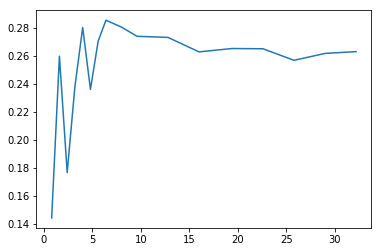

In [82]:
y22

[0.37998029782867415,
 0.5096827800827188,
 0.4204964789407537,
 0.48811375063303325,
 0.529383522203182,
 0.4859653913846296,
 0.5202048710098841,
 0.5342698142367177,
 0.5296938168115098,
 0.5234352324058521,
 0.5226814290642626,
 0.5127031246214221,
 0.5150363154996648,
 0.5148592199947704,
 0.5067995556253444,
 0.5116255981556944,
 0.5128791983444089]

In [334]:
data = pd.DataFrame(vis,index = range(1,len(vis)+1))
data.to_csv('weather_visi.csv')
!gsutil cp 'weather_visi.csv' 'gs://finalproject20/data'

Copying file://weather_visi.csv [Content-Type=text/csv]...
/ [1 files][  454.0 B/  454.0 B]                                                
Operation completed over 1 objects/454.0 B.                                      


In [131]:
weather3 = weather.filter(lambda x: x[0][1]!='0').map(lambda x: (x[0][0],x[1])).reduceByKey(lambda v1,v2:v1+v2).sortByKey()
weather_combine3 = weather3.map(lambda x: combine3(x))
weather_combine_clean3 = weather_combine3.map(lambda x: clean(x)).filter(lambda x: x!=None)
dataset2 = weather_combine_clean3.map(lambda x: (x[0],x[1][3])).map(lambda x: change(x)).toDF().toPandas()

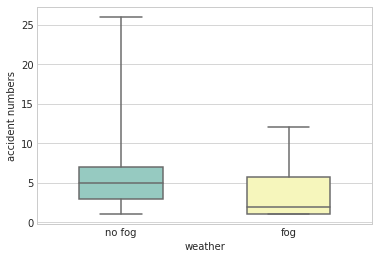

In [146]:
dataset2=dataset2.rename(columns={"_1":"accident numbers","_2":"weather"})
sns.set_style("whitegrid")
sns.boxplot(x='weather',y='accident numbers',data=dataset2,whis = [0, 100],palette="Set3",width=0.5)

In [326]:
dataset2.to_csv('weather_fog.csv')
!gsutil cp 'weather_fog.csv' 'gs://finalproject20/data'

Copying file://weather_fog.csv [Content-Type=text/csv]...
/ [1 files][111.3 KiB/111.3 KiB]                                                
Operation completed over 1 objects/111.3 KiB.                                    
